In [1]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("project4.csv")

In [3]:
def replace(s):
    x = s.split('-')
    x1 = int(x[0])
    x2 = int(x[1])
    return (x1+x2)/2 

In [4]:
data['age'] = data['age'].apply(replace).astype(float)
data['tumor-size'] = data['tumor-size'].apply(replace).astype(float)
data['inv-nodes'] = data['inv-nodes'].apply(replace).astype(float)

In [5]:
data[data['breast-quad'] == "?"] # just one row is missing data and there is no way to get the value so we will just remove it
data = data.drop([206])
data[data['breast-quad'] == "?"]
data.shape # one row was removed

(285, 10)

In [6]:
data.drop(data[data['node-caps'] == "?"].index,inplace=True)

In [7]:
data.drop_duplicates(inplace=True, ignore_index=True)
data.shape # eliminated 14 duplicates

(263, 10)

In [8]:
data['class'] = data['class'].astype('category')
data['menopause'] = data['menopause'].astype('category')
data['node-caps'] = data['node-caps'].astype('category')
data['breast'] = data['breast'].astype('category')
data['breast-quad'] = data['breast-quad'].astype('category')
data['irradiat'] = data['irradiat'].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   class        263 non-null    category
 1   age          263 non-null    float64 
 2   menopause    263 non-null    category
 3   tumor-size   263 non-null    float64 
 4   inv-nodes    263 non-null    float64 
 5   node-caps    263 non-null    category
 6   deg-malig    263 non-null    int64   
 7   breast       263 non-null    category
 8   breast-quad  263 non-null    category
 9   irradiat     263 non-null    category
dtypes: category(6), float64(3), int64(1)
memory usage: 10.7 KB


In [9]:
data = pd.get_dummies(data, columns=["class", "menopause", "node-caps","breast","breast-quad","irradiat"], drop_first=True)
data.shape

(263, 14)

<Axes: ylabel='inv-nodes'>

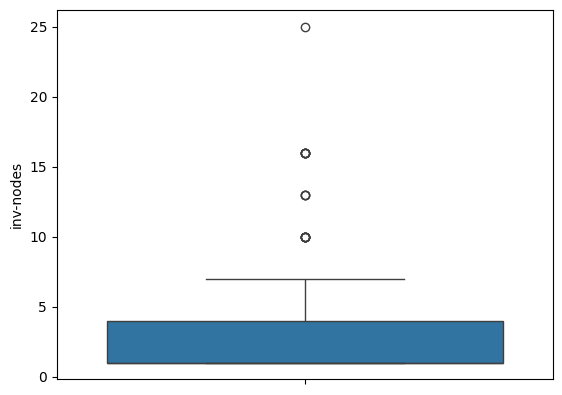

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=data['inv-nodes'])

<Axes: ylabel='tumor-size'>

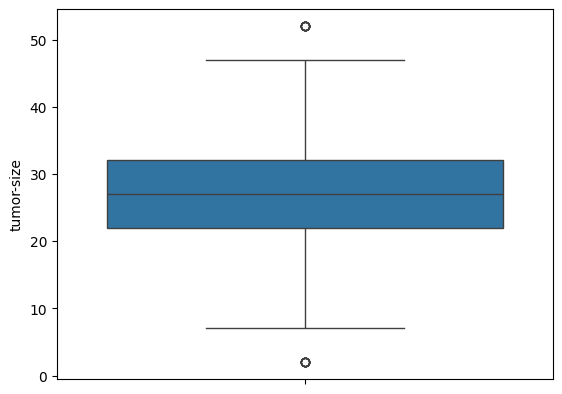

In [11]:
sns.boxplot(data=data['tumor-size']) # few outlier

<Axes: xlabel='age', ylabel='Count'>

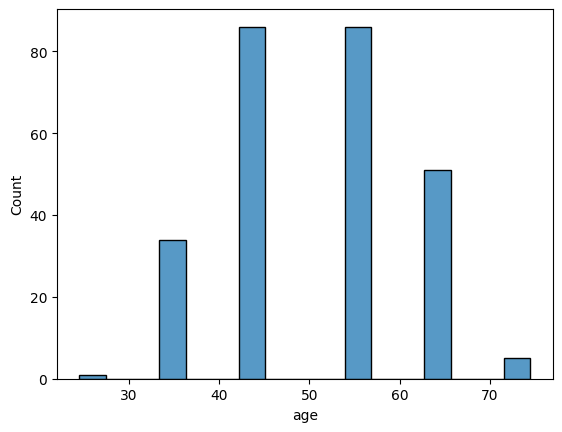

In [12]:
sns.histplot(data=data['age']) # we can see a large count between 40-60

<Axes: xlabel='deg-malig', ylabel='Count'>

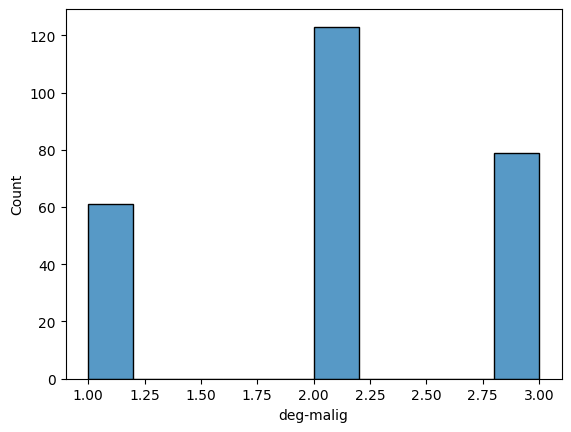

In [13]:
sns.histplot(data=data['deg-malig']) # most are 2 malig

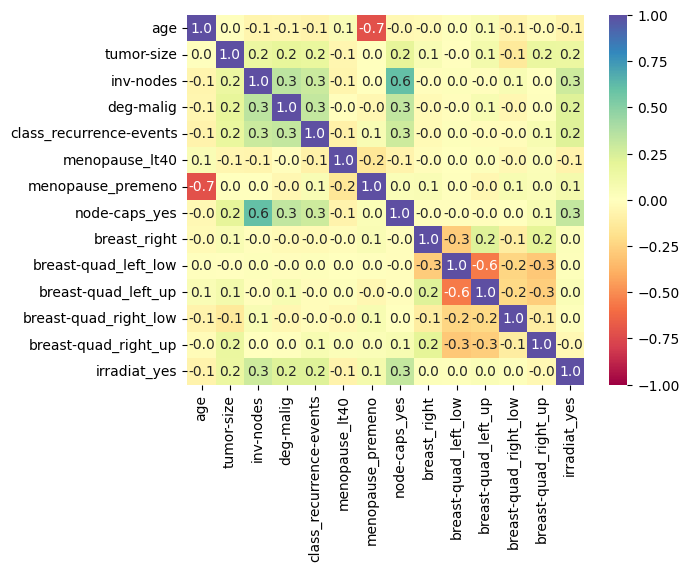

In [14]:

corr_cols = data.columns
# the actual heat map
sns.heatmap(
   data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".1f", cmap="Spectral"
)
# show the plot
plt.show()

In [15]:
X = data.drop('class_recurrence-events', axis=1)
y = data['class_recurrence-events']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

In [16]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [17]:
accuracy_test = accuracy_score(y_test, clf.predict(X_test))
accuracy_test

0.6962025316455697

In [18]:
accuracy_train=accuracy_score(y_train, clf.predict(X_train))
accuracy_train

0.7119565217391305

In [19]:
## attempting to improve accuracy using kernel functions
linear_svc = svm.SVC(kernel='linear')
linear_svc.fit(X_train,y_train)
linear_accuracy = accuracy_score(y_test, linear_svc.predict(X_test))
linear_train_accuracy = accuracy_score(y_train, linear_svc.predict(X_train))
linear_accuracy

0.6455696202531646

In [20]:
linear_train_accuracy

0.7989130434782609

In [21]:
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train,y_train)
poly_accuracy = accuracy_score(y_test, poly_svc.predict(X_test))
poly_train_accuracy = accuracy_score(y_train, poly_svc.predict(X_train))
poly_accuracy

0.6835443037974683

In [22]:
poly_train_accuracy

0.7391304347826086

In [23]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train,y_train)
rbf_accuracy = accuracy_score(y_test, rbf_svc.predict(X_test))
rbf_train_accuracy = accuracy_score(y_train, rbf_svc.predict(X_train))
rbf_accuracy

0.6962025316455697

In [24]:
rbf_train_accuracy

0.7119565217391305

In [25]:
sig_svc = svm.SVC(kernel='sigmoid')
sig_svc.fit(X_train,y_train)
sig_accuracy = accuracy_score(y_test, sig_svc.predict(X_test))
sig_train_accuracy = accuracy_score(y_train, sig_svc.predict(X_train))
sig_accuracy

0.7088607594936709

In [26]:
sig_train_accuracy

0.7065217391304348

In [27]:
## trying to optimize our polynomial svm, default degree is 3
poly_svc2 = svm.SVC(kernel='poly', degree = 12)
poly_svc2.fit(X_train,y_train)
poly_accuracy2 = accuracy_score(y_test, poly_svc2.predict(X_test))
poly_train_accuracy2 = accuracy_score(y_train, poly_svc2.predict(X_train))
poly_accuracy2

0.6962025316455697

In [28]:
poly_train_accuracy2

0.7717391304347826

In [29]:
## trying to see what polynomial degree leads to overfitting
poly_svc3 = svm.SVC(kernel='poly', degree = 18)
poly_svc3.fit(X_train,y_train)
poly_accuracy3 = accuracy_score(y_test, poly_svc3.predict(X_test))
poly_train_accuracy3 = accuracy_score(y_train, poly_svc3.predict(X_train))
poly_accuracy3

0.6708860759493671

In [30]:
poly_train_accuracy3

0.7989130434782609

In [31]:
param_grid = {
    "C" : np.arange(start=1, stop=3),
    "kernel" : ["poly","rbf","sigmoid"],
    "gamma" : ["scale","auto"]
}
model = svm.SVC()
opt = GridSearchCV(model, param_grid, cv=5, n_jobs=8, scoring="recall")

In [32]:
opt.fit(X_train,y_train)
opt.best_params_

{'C': 2, 'gamma': 'auto', 'kernel': 'poly'}

In [33]:
opt_accuracy = accuracy_score(y_test, opt.predict(X_test))
opt_train_accuracy = accuracy_score(y_train, opt.predict(X_train))
opt_accuracy

0.6329113924050633

In [34]:
opt_train_accuracy

0.8315217391304348

In [35]:
model1 = svm.SVC()
opt1 = GridSearchCV(model1, param_grid, cv=5, n_jobs=8, scoring="accuracy")
opt1.fit(X_train,y_train)
opt1.best_params_

{'C': 2, 'gamma': 'scale', 'kernel': 'poly'}

In [36]:
opt1_accuracy = accuracy_score(y_test, opt1.predict(X_test))
opt1_train_accuracy = accuracy_score(y_train, opt1.predict(X_train))
opt1_accuracy

0.6708860759493671

In [37]:
opt1_train_accuracy

0.75

In [38]:
print(f"SVM REPORTS\n")
print(f"Performance on TEST with Optimized Recall\n*******************\n{classification_report(y_test, opt.predict(X_test))}")
print(f"Performance on TRAIN with Optimized Recall\n********************\n{classification_report(y_train, opt.predict(X_train))}")

SVM REPORTS

Performance on TEST with Optimized Recall
*******************
              precision    recall  f1-score   support

       False       0.72      0.79      0.75        56
        True       0.33      0.26      0.29        23

    accuracy                           0.63        79
   macro avg       0.53      0.52      0.52        79
weighted avg       0.61      0.63      0.62        79

Performance on TRAIN with Optimized Recall
********************
              precision    recall  f1-score   support

       False       0.90      0.86      0.88       130
        True       0.69      0.76      0.73        54

    accuracy                           0.83       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.84      0.83      0.83       184



In [39]:
print(f"Performance on TEST with Optimized Accuracy\n*******************\n{classification_report(y_test, opt1.predict(X_test))}")
print(f"Performance on TRAIN with Optimized Accuracy\n********************\n{classification_report(y_train, opt1.predict(X_train))}")


Performance on TEST with Optimized Accuracy
*******************
              precision    recall  f1-score   support

       False       0.71      0.91      0.80        56
        True       0.29      0.09      0.13        23

    accuracy                           0.67        79
   macro avg       0.50      0.50      0.47        79
weighted avg       0.59      0.67      0.60        79

Performance on TRAIN with Optimized Accuracy
********************
              precision    recall  f1-score   support

       False       0.75      0.97      0.85       130
        True       0.75      0.22      0.34        54

    accuracy                           0.75       184
   macro avg       0.75      0.60      0.59       184
weighted avg       0.75      0.75      0.70       184



In [41]:
import pickle
with open('acc_svm', 'wb') as f:
    pickle.dump(opt1,f)
with open('recall_svm', 'wb') as f:
    pickle.dump(opt,f)